In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils

In [2]:
#data reading
data = pd.read_csv('insurance.csv')
data.info()
data.describe()

headers = data.columns
headers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [3]:
data.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


/var/folders/1r/jcq7c7353hsb6scsnq4g2pp00000gn/T/ipykernel_2416/3214842713.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot:>

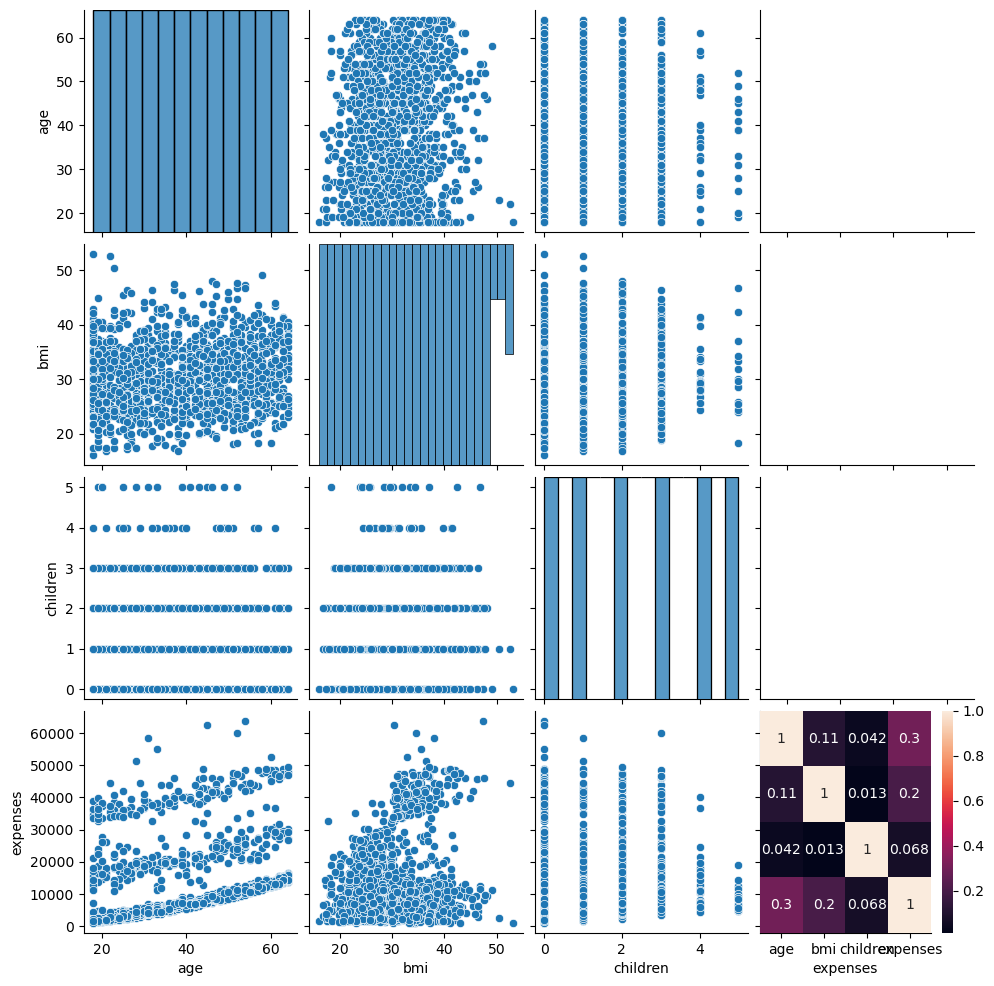

In [4]:
# visualition
sns.pairplot(data)
sns.heatmap(data.corr(), annot=True)

In [6]:
# normalization
data['expenses'] = data['expenses'] / max(data['expenses'])
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,0.264777
1,18,male,33.8,1,no,southeast,0.027059
2,28,male,33.0,3,no,southeast,0.069773
3,33,male,22.7,0,no,northwest,0.344744
4,32,male,28.9,0,no,northwest,0.060637


In [7]:
# null and na check
data.isnull().sum()
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
# change datas to numeric values
le = LabelEncoder()

data['sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)
data['smoker'].replace(['no', 'yes'],
                        [0, 1], inplace=True)

le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,3,0.264777
1,18,0,33.8,1,0,2,0.027059
2,28,0,33.0,3,0,2,0.069773
3,33,0,22.7,0,0,1,0.344744
4,32,0,28.9,0,0,1,0.060637


In [9]:
# data splitting
feature_names = headers[:-1] # input data
output = headers[-1] # output

x = data[feature_names]
y = data[output]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [10]:
# LinearRegression model building
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

LinearRegression()

In [11]:
k_values = model.coef_
b = model.intercept_
score = model.score(x_train, y_train)
score_test = model.score(x_test, y_test)

print('k: ',k_values,' b: ', b, ' score: ', score, ' score_test: ', score_test)

k:  [ 4.03068158e-03  2.93314781e-04  5.26794911e-03  6.67179404e-03
  3.70813358e-01 -4.25310721e-03]  b:  -0.1877105748339098  score:  0.7417300723597997  score_test:  0.7833214205203848


In [12]:
# train and predicted values
prediction_train = model.predict(x_train)
prediction_test = model.predict(x_test)

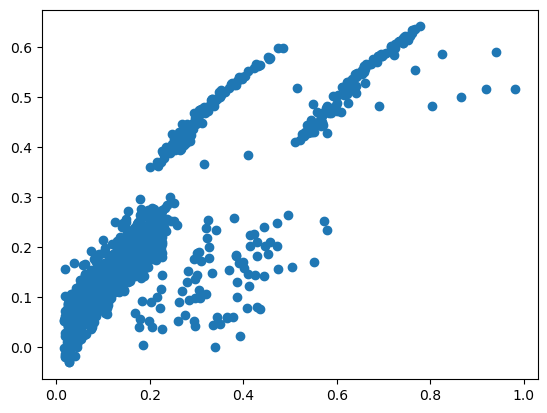

In [13]:
# displaying LinearRegression line
plt.plot(y_train, prediction_train, 'o')

a = np.arange(np.min(y_train), np.max(y_train))
plt.plot(a,a)

In [14]:
# mlp
x_train.shape, y_train.shape, x_test.shape, y_test.shape  


((1070, 6), (1070,), (268, 6), (268,))

In [15]:
# data prep
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [16]:
# model building
batch_size = 32
epochs = 50
dropout = 0.25

model = keras.Sequential(name = 'insurance')
model.add(layers.Input(shape = (x_train.shape[1])))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(dropout))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(dropout))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(dropout))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))

model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "insurance"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1792      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                               

2022-11-21 00:58:32.609679: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-21 00:58:32.610773: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/50


2022-11-21 00:58:44.943336: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-21 00:58:45.213476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 2s 33ms/step - loss: 0.2861 - accuracy: 0.9355
Epoch 2/50
34/34 [==============================] - 0s 11ms/step - loss: 2.8015e-05 - accuracy: 1.0000
Epoch 3/50
34/34 [==============================] - 0s 10ms/step - loss: 2.4915e-05 - accuracy: 1.0000
Epoch 4/50
34/34 [==============================] - 0s 10ms/step - loss: 1.4082e-05 - accuracy: 1.0000
Epoch 5/50
34/34 [==============================] - 0s 10ms/step - loss: 2.7931e-06 - accuracy: 1.0000
Epoch 6/50
34/34 [==============================] - 0s 10ms/step - loss: 1.2046e-06 - accuracy: 1.0000
Epoch 7/50
34/34 [==============================] - 0s 10ms/step - loss: 7.0768e-07 - accuracy: 1.0000
Epoch 8/50
34/34 [==============================] - 0s 10ms/step - loss: 3.1044e-07 - accuracy: 1.0000
Epoch 9/50
34/34 [==============================] - 0s 10ms/step - loss: 2.1576e-07 - accuracy: 1.0000
Epoch 10/50
34/34 [==============================] - 0s 10ms/step - loss: 1.8001e-07 - a

8/9 [=========================>....] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

2022-11-21 00:59:06.233367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 3ms/step
dict_keys(['loss', 'accuracy'])


2022-11-21 00:59:06.577919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


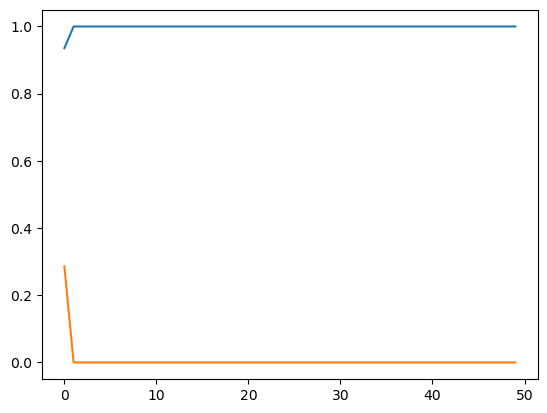

In [18]:
#model evaluation
loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
prediction = (model.predict(x_test)*100).astype('int')
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

9/9 [==============================] - 0s 2ms/step
dict_keys(['loss', 'accuracy'])


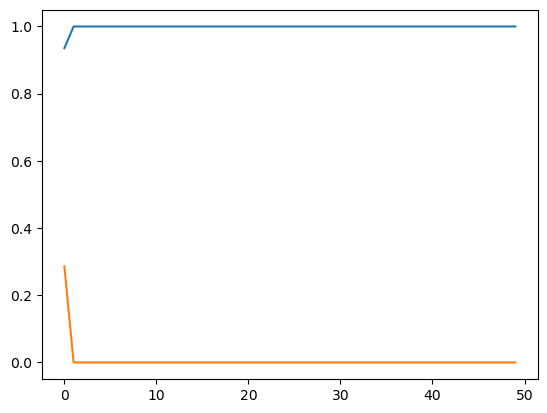

In [43]:
loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
prediction = (model.predict(x_test)*100).astype('int')
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
